# Illustrations for supervised, unsupervised and semi-supervised tasks

In [22]:
import json

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
with open('config.json', 'r') as config_file:
    config = json.load(config_file)

In [24]:
BASE_COLOR = config['base_color']
LIGHT_COLOR = config['light_color']
DPI = config['dpi']
EDGE_COLOR = config['edge_color']
AXIS_COLOR = config['axis_color']
GRID_COLOR = config['grid_color']
FORMAT = config['format']

In [25]:
np.random.seed(42)

In [26]:
palette = f"blend:{BASE_COLOR},{LIGHT_COLOR}"

In [27]:
rc = {'axes.edgecolor': AXIS_COLOR,
      'axes.labelcolor': AXIS_COLOR,
      'grid.linestyle': '--',
      'text.color': AXIS_COLOR,
      'xtick.color': AXIS_COLOR,
      'ytick.color': AXIS_COLOR,
      'grid.color': GRID_COLOR}

In [28]:
sns.set(font_scale=2)
sns.set_style("whitegrid", rc=rc)
sns.set_context("talk")

In [29]:
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]

In [30]:
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)

In [31]:
offset = 3

In [32]:
X1 = 0.5 * np.random.randn(n_inliers) + offset
X2 = 0.5 * np.random.randn(n_inliers) - offset

In [33]:
outliers_1 = np.random.uniform(low=-6, high=6, size=(n_outliers))
outliers_2 = np.random.uniform(low=-6, high=6, size=(n_outliers))

In [34]:
data = pd.concat([pd.DataFrame({'попугаи': X1, 'удавы': X2, 'аномалия': ['нет'] * n_inliers}), 
                  pd.DataFrame({'попугаи': outliers_1, 'удавы': outliers_2, 'аномалия': ['да'] * n_outliers})])

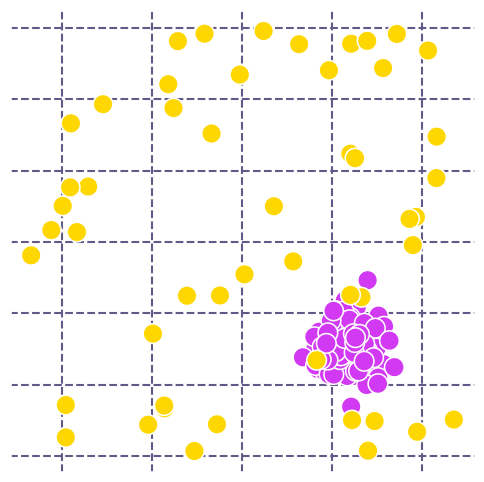

In [35]:
plt.figure(figsize=(6, 6))
ax = sns.scatterplot(data, x='попугаи', y='удавы', s=200, 
                     edgecolor=EDGE_COLOR, hue='аномалия', legend=False, palette=palette)
ax.set(xlabel='', ylabel='')
ax.set(xticklabels=[], yticklabels=[])
plt.savefig(f"images/supervised.{FORMAT}", bbox_inches='tight', transparent=True, dpi=DPI)

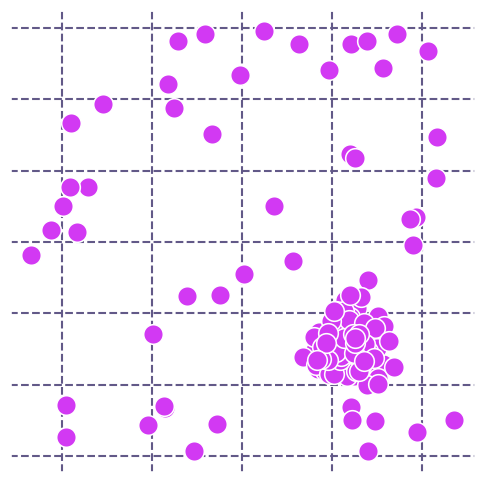

In [36]:
plt.figure(figsize=(6, 6))
ax = sns.scatterplot(data, x='попугаи', y='удавы', color=BASE_COLOR, s=200, edgecolor=EDGE_COLOR, legend=True)
ax.set(xlabel='', ylabel='')
ax.set(xticklabels=[], yticklabels=[])
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
plt.savefig(f"images/unsupervised.{FORMAT}", bbox_inches='tight', transparent=True, dpi=DPI)

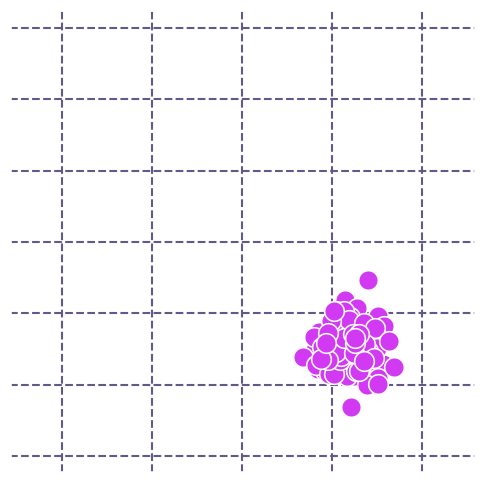

In [37]:
plt.figure(figsize=(6, 6))
ax = sns.scatterplot(pd.DataFrame({'попугаи': X1, 'удавы': X2, 'аномалия': ['нет'] * n_inliers}), 
                     x='попугаи', y='удавы', color=BASE_COLOR, s=200, edgecolor=EDGE_COLOR, legend=True)
ax.set(xlabel='', ylabel='')
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set(xticklabels=[], yticklabels=[])
plt.savefig(f"images/semisupervised.{FORMAT}", bbox_inches='tight', transparent=True, dpi=DPI)

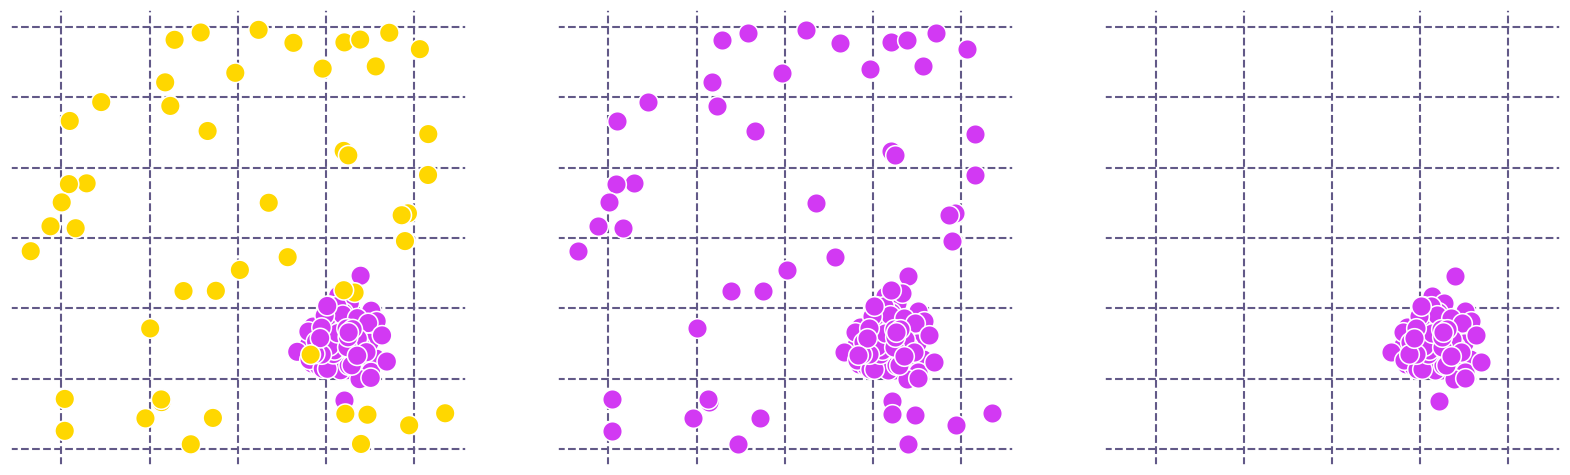

In [38]:
_, [axs_sup, axs_unsup, axs_semisup] = plt.subplots(1, 3,
                                     figsize=(20, 6), 
                                     sharey=True, sharex=True,
                                     gridspec_kw=dict(width_ratios=[1, 1, 1]))

ax = sns.scatterplot(data, x='попугаи', y='удавы', s=200, edgecolor=EDGE_COLOR, 
                     hue='аномалия', legend=False, palette=palette, ax=axs_sup)
ax.set(xlabel='', ylabel='')
ax.set(xticklabels=[], yticklabels=[])
axs_sup.set_box_aspect(1)

ax = sns.scatterplot(data, x='попугаи', y='удавы', color=BASE_COLOR, s=200, 
                     edgecolor=EDGE_COLOR, legend=False, ax=axs_unsup)
ax.set(xlabel='', ylabel='')
ax.set(xticklabels=[], yticklabels=[])
axs_unsup.set_box_aspect(1)

ax = sns.scatterplot(pd.DataFrame({'попугаи': X1, 'удавы': X2, 'аномалия': ['нет'] * n_inliers}), 
                     x='попугаи', y='удавы', color=BASE_COLOR, s=200, edgecolor=EDGE_COLOR, legend=True, ax=axs_semisup)
ax.set(xlabel='', ylabel='')
ax.set(xticklabels=[], yticklabels=[])
axs_semisup.set_box_aspect(1)

plt.savefig(f"images/sup_unsup_semisup.{FORMAT}", bbox_inches='tight', transparent=True, dpi=DPI)

In [39]:
real = data[data['аномалия'] == 'да'].sample(10)

In [40]:
radius = 0.5

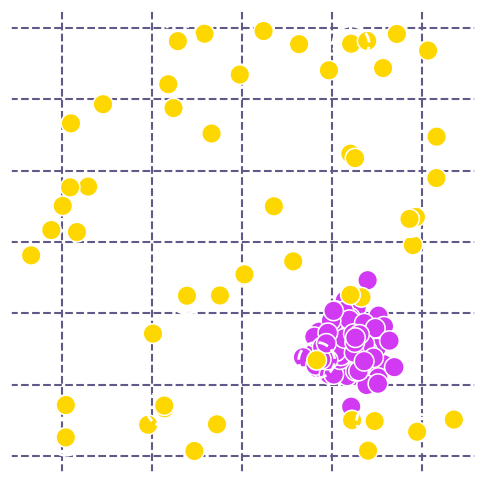

In [41]:
plt.figure(figsize=(6, 6))
ax = sns.scatterplot(data, x='попугаи', y='удавы', s=200, edgecolor=EDGE_COLOR, 
                     hue='аномалия', legend=False, palette=palette)
ax.set(xlabel='', ylabel='')
ax.set(xticklabels=[], yticklabels=[])

for _, anomaly in real.iterrows():
    ax.add_artist(plt.Circle((anomaly['попугаи'], anomaly['удавы']), radius, color=AXIS_COLOR, 
                             fill=False, linestyle='--', linewidth=2))
    
plt.savefig(f"images/anomaly_noise.{FORMAT}", bbox_inches='tight', transparent=True, dpi=DPI)

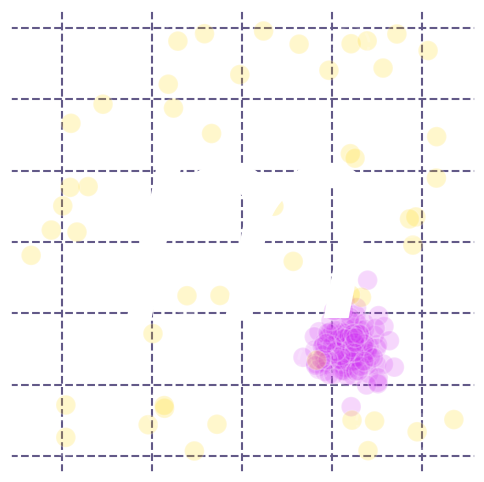

In [42]:
plt.figure(figsize=(6, 6))
ax = sns.scatterplot(data, x='попугаи', y='удавы', s=200, edgecolor=EDGE_COLOR, 
                     hue='аномалия', legend=False, palette=palette, alpha=0.2)
ax.set(xlabel='', ylabel='')
ax.set(xticklabels=[], yticklabels=[])

for _, anomaly in real.iterrows():
    ax.add_artist(plt.Circle((anomaly['попугаи'], anomaly['удавы']), radius, color=AXIS_COLOR, 
                             fill=False, linestyle='--', linewidth=2, alpha=0.2))
ax.text(0.5, 0.5, '$m$', fontsize=200, ha='center', va='center', alpha=1.0, color=AXIS_COLOR,
        transform=ax.transAxes)

plt.savefig(f"images/anomaly_model.{FORMAT}", bbox_inches='tight', transparent=True, dpi=DPI)